<a href="https://colab.research.google.com/github/wekann/Assignment/blob/main/Analysis_pyth_proj_Blinkit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'''BUSINESS REQUIREMENT
to conduct a comprehsive analysis of blinkit sales performance, customer satisfaction , and inventory distribution to identify key insights and opportunities for optimization using various KPIs and visualizations in power Bi
KPI's REQUIREMENTS
1. Total sales: The overall revenue generated from all items sold.
2. Average sales: The average revenue per sale
3. Number of Items: The total count of difference items sold.
4. Average Rating: The average customer rating for items sold.'''

Charts Requirements

1. Total sales by Fat content:
objectives: analyze the impact of fat content on total sales
additional KPI metrics: assess how other KPIs(Average sales, Number of items, avg rating) vary with fat content.
chart type: Donut chart

2. Total sales by item type:
obj: identify the performance of different item types in terms of total sales.
Addt KPI metrics: Assess how other KPIs (Average sales, Number of items, avg rating) vary with fat content.
chart type: Bar chart

3. Fat content by Outlet for Total sales:
obj: Compare total sales across different outlets segmented by fat content.
Adt KPI metrics: Assesss how other KPIs (Average sales, Number of items, avg rating) vary with fat content.
chart type: stacked column chart.

4. Total sales by Outlet Estlb:
Obj: Evaluate how the age or type of Outlet estb influences total sales.
chart type: Line chart

5. Sales by outlet size:
obj: analyze the correlation between outlet size and total sales.
chart type: Donut/Pie chart

6. Sales by outlet Location:
obj: Assess the geographic distribution of sales across different locations.
chart type: Funnel Map.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Raw Data

In [6]:
df = pd.read_csv('/content/blinkit_data.csv')

sample data

In [7]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [8]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [9]:
print('size of Data: ', df.shape)

size of Data:  (8523, 12)


In [10]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [11]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


DATA CLEANING

In [12]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [13]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [14]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


Business Requirements

KPIs requirements

In [15]:
#Total sales
total_sales = df['Sales'].sum()

#Average sales
avg_sales = df['Sales'].mean()

#No of items sold
no_of_items_sold = df['Sales'].count()

#Average ratings
avg_ratings = df['Rating'].mean()

#display

print(f"total sales: {total_sales:,.1f}")
print(f"Average sales: {avg_sales:,.1f}")
print(f"No of Items sold: {no_of_items_sold:,.1f}")
print(f"Average ratings: {avg_ratings:,.1f}")



total sales: 1,201,681.5
Average sales: 141.0
No of Items sold: 8,523.0
Average ratings: 4.0


CHARTS REQUIREMENTS

Total Sales by Fat Content

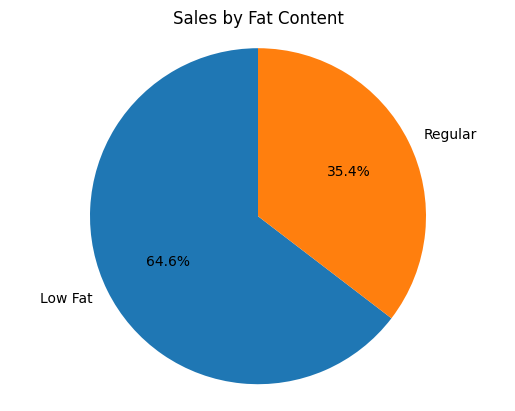

In [16]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,
                        autopct = '%.1f%%', startangle = 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

2. Total Sales by Item Type

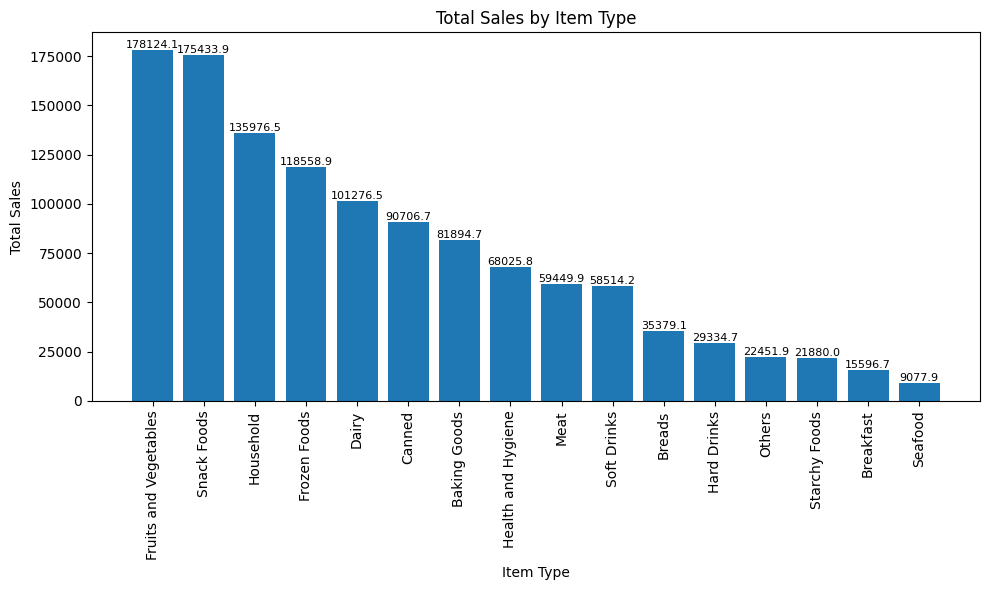

In [17]:
Sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

plt.figure(figsize=(10, 6))
bars = plt.bar(Sales_by_type.index, Sales_by_type.values)

plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha = 'center', va = 'bottom', fontsize = 8)


plt.tight_layout()
plt.show()

Fat Content by outlet for Total Sales

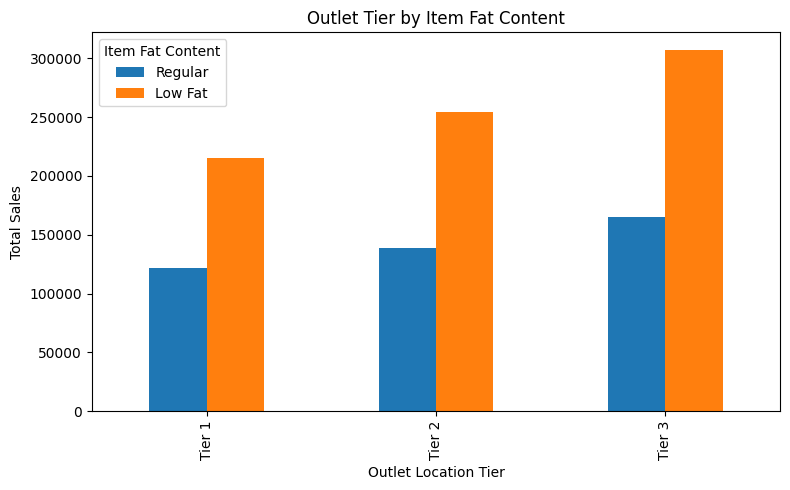

In [20]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title= 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


Total Sales by Outlet Establishment

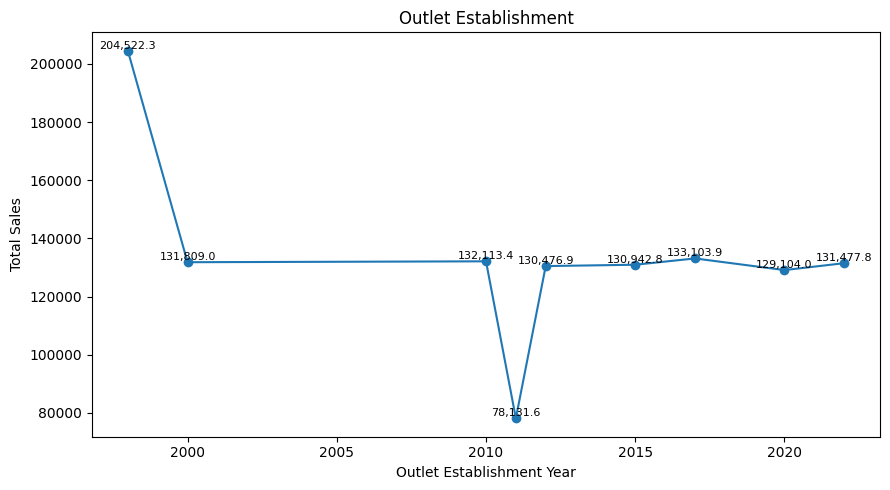

In [25]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Sales by Outlet size

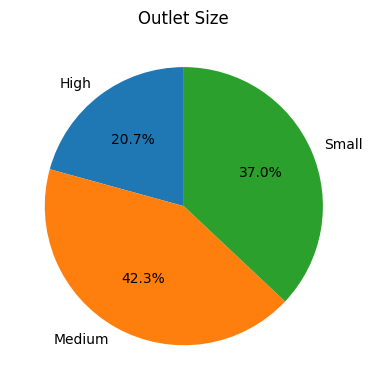

In [28]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

Sales by Outlet Location

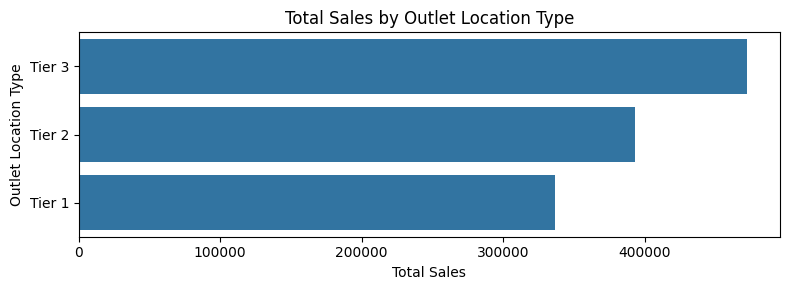

In [32]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3)) #smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout() #ensure layout fits without scroll
plt.show()